**Diabetes data modeling**



*   Import the required libraries



In [137]:
#Import libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as snv
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.tree import plot_tree



*   Upload dataset



In [89]:
!git clone https://github.com/M-Arashi/DataMining-Python.git
%cd DataMining-Python

Cloning into 'DataMining-Python'...
remote: Enumerating objects: 82, done.
remote: Counting objects: 100% (30/30), done.
remote: Compressing objects: 100% (30/30), done.
remote: Total 82 (delta 10), reused 0 (delta 0), pack-reused 52
Receiving objects: 100% (82/82), 4.79 MiB | 18.22 MiB/s, done.
Resolving deltas: 100% (30/30), done.
/content/DataMining-Python/DataMining-Python/DataMining-Python/DataMining-Python


In [90]:
#Import data
data = pd.read_csv('diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1




1.   Data cleaning



In [91]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


*   Explore the data and get familiar to its features

In [92]:
#Find the dimensions of the dataset
data.shape

(768, 9)

In [10]:
#Check basic information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
#First 5 rows of the dataset
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [16]:
#The last 5 rows of the dataset
data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48.000000,180,32.9,0.171,63,0
764,2,122,70,27.000000,0,36.8,0.340,27,0
765,5,121,72,23.000000,112,26.2,0.245,30,0
766,1,126,60,20.536458,0,30.1,0.349,47,1
767,1,93,70,31.000000,0,30.4,0.315,23,0


Skin thickness, Body Mass Index (BMI), blood pressure, age and glucose cannot be zero. The zero value has been replaced by its corresponding mean value based on "Diabetes prediction using machine learning and explainable AI techniques" article by Isfafuzzaman Tasin et.all.

In [93]:
(data['Glucose'] == 0).sum()

5

In [94]:
(data['BloodPressure'] == 0).sum()

35

In [95]:
(data['SkinThickness'] == 0).sum()

227

In [96]:
(data['BMI'] == 0).sum()

11

In [97]:
(data['Age'] == 0).sum()

0

In [99]:
# Replacing zero values in 'BMI' column with mean
mean_bmi = round(data.loc[data['BMI'] != 0, 'BMI'].mean(),2)
data['BMI'] = data['BMI'].replace(0, mean_bmi)

# Replacing zero values in 'SkinThickness' column with mean
mean_skin = round(data.loc[data['SkinThickness'] != 0, 'SkinThickness'].mean(),2)
data['SkinThickness'] = data['SkinThickness'].replace(0, mean_skin)

# Replacing zero values in 'Glucose' column with mean
mean_Glucose = round(data.loc[data['Glucose'] != 0, 'Glucose'].mean(),2)
data['Glucose'] = data['Glucose'].replace(0, mean_Glucose)

# Replacing zero values in 'BloodPressure' column with mean
mean_BloodPressure = round(data.loc[data['BloodPressure'] != 0, 'BloodPressure'].mean(),2)
data['BloodPressure'] = data['BloodPressure'].replace(0, mean_BloodPressure)

In [100]:
(data['BMI'] == 0).any()

False

In [101]:
(data['SkinThickness'] == 0).any()

False

In [102]:
(data['Glucose'] == 0).any()

False

In [103]:
(data['BloodPressure'] == 0).any()

False

In [104]:
#Take sample from rows
data.sample(n=25)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
158,2,88.0,74.00,19.00,53,29.00,0.229,22,0
410,6,102.0,90.00,39.00,0,35.70,0.674,28,0
674,8,91.0,82.00,20.54,0,35.60,0.587,68,0
417,4,144.0,82.00,32.00,0,38.50,0.554,37,1
619,0,119.0,69.11,20.54,0,32.40,0.141,24,1
371,0,118.0,64.00,23.00,89,32.46,1.731,21,0
309,2,124.0,68.00,28.00,205,32.90,0.875,30,1
272,3,122.0,78.00,20.54,0,23.00,0.254,40,0
398,3,82.0,70.00,20.54,0,21.10,0.389,25,0
137,0,93.0,60.00,25.00,92,28.70,0.532,22,0


BMI can not be less than 6.7 based on "Mortality in extremely low BMI anorexia nervosa patients - implications of gastrointestinal and endocrine system dysfunction" article by Monika Suszko.

In [105]:
(data['BMI'] < 6.7).any()

False


2.   Draw a plot





*   Draw histogram for age and outcome


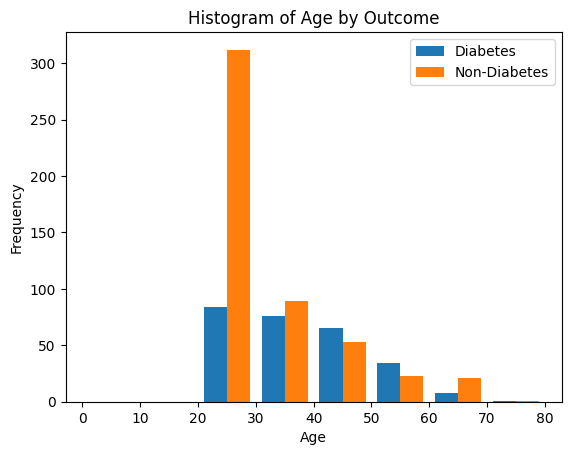

In [106]:
# Define the bins for age
bins = range(0, max(data['Age']), 10)

# Create the histogram
plt.hist([data[data['Outcome'] == 1]['Age'], data[data['Outcome'] == 0]['Age']], bins=bins, label=['Diabetes', 'Non-Diabetes'])

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age by Outcome')
plt.legend()

# Show the plot
plt.show()



*   Histogram for people who have diabetes



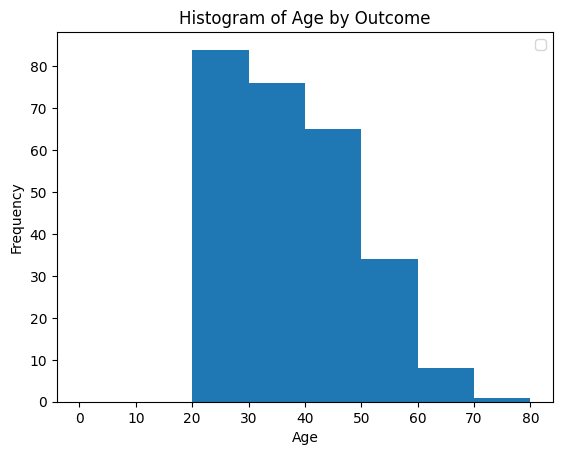

In [107]:
# Define the bins for age
bins = range(0, max(data['Age']), 10)

# Create the histogram
plt.hist([data[data['Outcome'] == 1]['Age']], bins=bins)

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age by Outcome')
plt.legend()

# Show the plot
plt.show()

3. Draw a pie plot

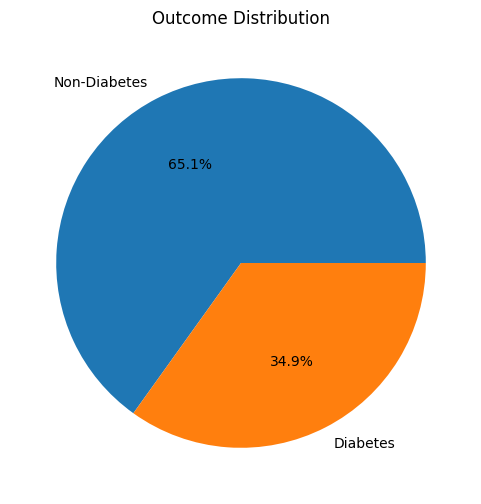

In [108]:
import matplotlib.pyplot as plt

# Count the number of diabetic and non-diabetic individuals
outcome_counts = data['Outcome'].value_counts()

# Plotting the pie plot
plt.figure(figsize=(6, 6))
plt.pie(outcome_counts, labels=['Non-Diabetes', 'Diabetes'], autopct='%1.1f%%')
plt.title('Outcome Distribution')
plt.show()




4. Test and train


In [109]:
x=data.iloc[:, :-1]
y=data['Outcome']

In [122]:
x_train , x_test , y_train , y_test = train_test_split (x , y , test_size=0.2 , random_state=5)
display (x_train . shape , y_train . shape , x_test . shape , y_test . shape)

(614, 8)

(614,)

(154, 8)

(154,)

5. Features and Target



*   Feature matrix:



In [111]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.00,0,33.6,0.627,50
1,1,85.0,66.0,29.00,0,26.6,0.351,31
2,8,183.0,64.0,20.54,0,23.3,0.672,32
3,1,89.0,66.0,23.00,94,28.1,0.167,21
4,0,137.0,40.0,35.00,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.00,180,32.9,0.171,63
764,2,122.0,70.0,27.00,0,36.8,0.340,27
765,5,121.0,72.0,23.00,112,26.2,0.245,30
766,1,126.0,60.0,20.54,0,30.1,0.349,47




*   Target column:



In [112]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

6. Decision tree and logistic model



*   Decision Tree



In [140]:
model= DecisionTreeClassifier (criterion= 'entropy' , random_state=5)
model.fit(x_train , y_train)
y_pred=model.predict (x_test)
print('y_pred for Decision Tree:' , y_pred)

y_pred for Decision Tree: [1 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 1 0 1
 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 1 1 0 1 0 0 1
 0 1 1 0 0 0 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0 1 1 0 0 0 0 1 0 1
 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0
 1 0 1 1 0 1]


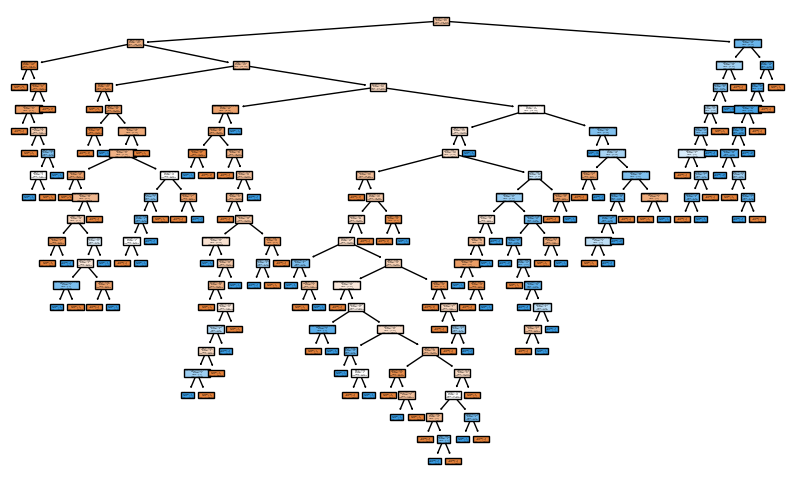

Feature Importances:
[0.07496969 0.24805142 0.05425372 0.05602697 0.06033004 0.17680222
 0.17396596 0.15559999]


In [142]:
# Visualize the decision tree
plt.figure(figsize=(10, 6))
plot_tree(model, feature_names=x.columns, class_names=['Non-Diabetes', 'Diabetes'], filled=True)
plt.show()

# Interpret the decision tree structure
# You can interpret the tree structure manually or using feature importance attributes
print("Feature Importances:")
print(model.feature_importances_)



*    Logistic Regression



In [133]:
model2= LogisticRegression(solver='lbfgs', max_iter=1000)
model2.fit(x_train, y_train)
y_pred2=model.predict(x_test)
print('y_pred Logistic:' , y_pred2)

y_pred Logistic: [0 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 1 1 0 1 0 0 0 1 0 1 0 0 1
 1 0 0 1 1 0 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 1 1 0 1 0 0 1 0 0
 1 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 0 1 0 0 1]


In [145]:

# Interpret the coefficients
print("Coefficients:")
print(model2.coef_)

Coefficients:
[[ 0.12045456  0.03638645 -0.01422421 -0.0036075  -0.00107463  0.0990349
   0.9287606   0.01517938]]


7. Comparing the models

* Evaluation Metrics in Decision Tree

In [147]:
# Evaluate the model
accuracy_tree = metrics.accuracy_score(y_test, y_pred)
print("\nDecision Tree Model Accuracy:", accuracy_tree)
print('Accuracy in Percentage for Decision Tree: ', int(accuracy_tree*100),'%')
print("Classification Report:")
print(classification_report(y_test, y_pred))



Decision Tree Model Accuracy: 0.6948051948051948
Accuracy in Percentage for Decision Tree:  69 %
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.78      0.77       100
           1       0.57      0.54      0.55        54

    accuracy                           0.69       154
   macro avg       0.66      0.66      0.66       154
weighted avg       0.69      0.69      0.69       154



* Evaluation Metrics in Logistic Regression

In [150]:
# Evaluate the model
accuracy_logistic =metrics.accuracy_score(y_test, y_pred2)
print("Logistic Regression Model Accuracy:", accuracy_logistic)
print('Accuracy in Percentage for Logistic model: ', int(accuracy_logistic*100),'%')
print("Classification Report:")
print(classification_report(y_test, y_pred2))


Logistic Regression Model Accuracy: 0.8376623376623377
Accuracy in Percentage for Logistic model:  83 %
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.91      0.88       100
           1       0.81      0.70      0.75        54

    accuracy                           0.84       154
   macro avg       0.83      0.81      0.82       154
weighted avg       0.84      0.84      0.83       154



8. prediction

In [165]:
#defining new record
new_data= pd.DataFrame([[4,105,70,19,0,43.3,0.537,27]])
new_data.columns=['Pregnancies','Glucose',	'BloodPressure'	,'SkinThickness',	'Insulin',	'BMI',	'DiabetesPedigreeFunction',	'Age'	]
new_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,4,105,70,19,0,43.3,0.537,27


In [166]:
#prediction by Decision Tree
tree_predictions = model.predict(new_data)
print("Predictions using Decision Tree Model:", tree_predictions)

Predictions using Decision Tree Model: [0]


In [167]:
##prediction by Logistic Regression
logistic_predictions = model2.predict(new_data)
print("Predictions using Logistic Regression Model:", logistic_predictions)

Predictions using Logistic Regression Model: [0]


9. Confusion matrix

In [152]:
#confusion matrix for Decision Tree
conf_mat=metrics.confusion_matrix(y_test, y_pred)
print('Confusion Matrix for Decision Tree: ', conf_mat)
Accuracy_score=metrics.accuracy_score(y_test,y_pred)


Confusion Matrix for Decision Tree:  [[78 22]
 [25 29]]


Text(0.5, 1.0, 'Confusion Matrix for Decision Tree')

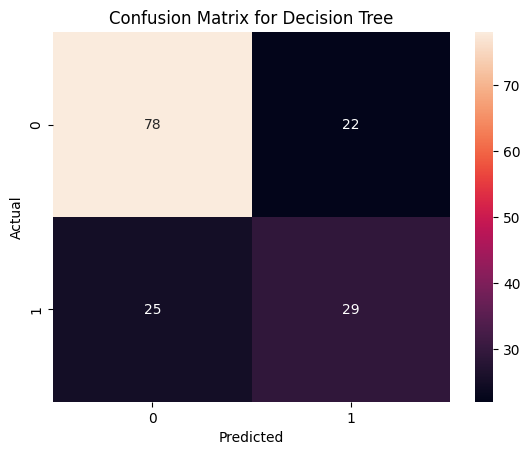

In [168]:
conf_mat=pd.crosstab(y_test, y_pred, rownames=['Actual'],
 colnames=['Predicted'])
snv.heatmap(conf_mat, annot=True)
plt.title('Confusion Matrix for Decision Tree')

In [151]:
#confusion matrix for Logistic model
conf_mat2=metrics.confusion_matrix(y_test, y_pred2)
print('Confusion Matrix for Logistic model: ', conf_mat2)

Confusion Matrix for Logistic model:  [[91  9]
 [16 38]]


Text(0.5, 1.0, 'Confusion Matrix for Logistic model')

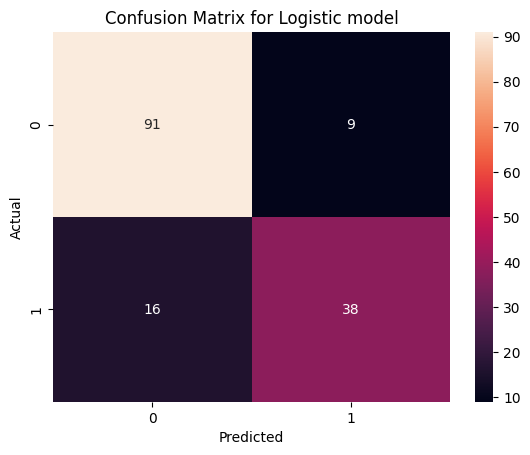

In [169]:
conf_mat2=pd.crosstab(y_test, y_pred2, rownames=['Actual'],
 colnames=['Predicted'])
snv.heatmap(conf_mat2, annot=True)
plt.title('Confusion Matrix for Logistic model')